In [1]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import os

In [2]:
pokedex = pd.read_csv('Pokemon.csv')
pokedex.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# This is Daniels section of code
# Classification of Legendary Status
y = pokedex["Legendary"]
y.value_counts()


False    735
True      65
Name: Legendary, dtype: int64

In [4]:
X = pokedex.drop("Legendary", axis=1)
X = X.drop("#", axis=1)
X = X.drop("Name", axis=1)
X = X.drop("Type 1", axis=1)
X = X.drop("Type 2", axis=1)
X = X.drop("Generation", axis=1)
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.920
k: 3, Train/Test Score: 0.977/0.910
k: 5, Train/Test Score: 0.960/0.905
k: 7, Train/Test Score: 0.958/0.920
k: 9, Train/Test Score: 0.953/0.925
k: 11, Train/Test Score: 0.945/0.925
k: 13, Train/Test Score: 0.948/0.935
k: 15, Train/Test Score: 0.952/0.935
k: 17, Train/Test Score: 0.945/0.935
k: 19, Train/Test Score: 0.948/0.930


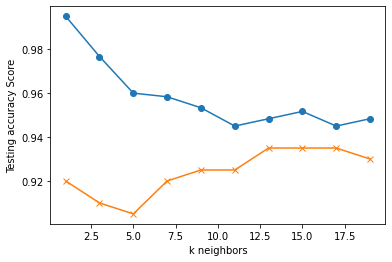

In [8]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
# Note that k: 15 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.935


In [10]:
predicted_class = knn.predict(X_scaler.transform(X))
# print(predicted_class)

In [11]:
# Classification of Primary Type
y2 = pokedex["Type 1"]
y2.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=47)

X_scaler2 = StandardScaler().fit(X_train)

X_train_scaled = X_scaler2.transform(X_train)
X_test_scaled = X_scaler2.transform(X_test)

k: 1, Train/Test Score: 0.990/0.180
k: 3, Train/Test Score: 0.485/0.155
k: 5, Train/Test Score: 0.418/0.190
k: 7, Train/Test Score: 0.417/0.210
k: 9, Train/Test Score: 0.383/0.195
k: 11, Train/Test Score: 0.360/0.205
k: 13, Train/Test Score: 0.372/0.215
k: 15, Train/Test Score: 0.348/0.235
k: 17, Train/Test Score: 0.342/0.240
k: 19, Train/Test Score: 0.322/0.235


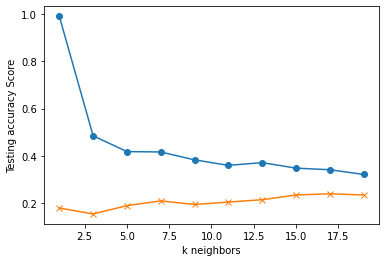

In [13]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
# Note that k: 17 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.240


In [15]:
predicted_class = knn.predict(X_scaler2.transform(X))
# print(predicted_class)

predictions = pokedex[['Name',"Type 1"]]
predictions['Predicted Type'] = predicted_class
predictions.head()

<ipython-input-15-53e135d534af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Predicted Type'] = predicted_class


,Name,Type 1,Predicted Type
0,Bulbasaur,Grass,Water
1,Ivysaur,Grass,Grass
2,Venusaur,Grass,Water
3,VenusaurMega Venusaur,Grass,Psychic
4,Charmander,Fire,Fire


In [16]:
accuracy = []
for index, row in predictions.iterrows():
    if predictions.loc[index,'Type 1'] == predictions.loc[index,'Predicted Type']:
        accuracy.append(1)
    else:
        accuracy.append(0)
predictions['Accurate'] = accuracy
predictions.head()

<ipython-input-16-4e4376b56e8c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Accurate'] = accuracy


,Name,Type 1,Predicted Type,Accurate
0,Bulbasaur,Grass,Water,0
1,Ivysaur,Grass,Grass,1
2,Venusaur,Grass,Water,0
3,VenusaurMega Venusaur,Grass,Psychic,0
4,Charmander,Fire,Fire,1


In [17]:
grouping = predictions.groupby('Type 1')
grouping.mean()

,Accurate
Type 1,
Bug,0.550725
Dark,0.032258
Dragon,0.437500
Electric,0.454545
Fairy,0.058824
Fighting,0.074074
Fire,0.480769
Flying,0.000000
Ghost,0.218750


In [18]:
# This is Tanners section of code

from numpy.random import seed
seed(1)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets


y = pokedex['Legendary']

X = pokedex.drop("Legendary", axis=1)
X = X.drop("#", axis=1)
X = X.drop("Name", axis=1)
X = X.drop("Type 1", axis=1)
X = X.drop("Type 2", axis=1)
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [19]:
 # Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [21]:
 # Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [24]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=8))
model.add(Dense(units=2, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
 # Fit the model to the training data
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle = True,
    verbose = 2,
    validation_data=(X_test_scaled,y_test_categorical)
)

Epoch 1/100
19/19 - 0s - loss: 0.7532 - accuracy: 0.5367 - val_loss: 0.6775 - val_accuracy: 0.5850
Epoch 2/100
19/19 - 0s - loss: 0.6975 - accuracy: 0.6183 - val_loss: 0.6239 - val_accuracy: 0.7300
Epoch 3/100
19/19 - 0s - loss: 0.6457 - accuracy: 0.7017 - val_loss: 0.5758 - val_accuracy: 0.7850
Epoch 4/100
19/19 - 0s - loss: 0.5981 - accuracy: 0.7683 - val_loss: 0.5316 - val_accuracy: 0.8050
Epoch 5/100
19/19 - 0s - loss: 0.5547 - accuracy: 0.8067 - val_loss: 0.4928 - val_accuracy: 0.8700
Epoch 6/100
19/19 - 0s - loss: 0.5137 - accuracy: 0.8267 - val_loss: 0.4565 - val_accuracy: 0.8800
Epoch 7/100
19/19 - 0s - loss: 0.4772 - accuracy: 0.8500 - val_loss: 0.4241 - val_accuracy: 0.8850
Epoch 8/100
19/19 - 0s - loss: 0.4445 - accuracy: 0.8650 - val_loss: 0.3956 - val_accuracy: 0.8900
Epoch 9/100
19/19 - 0s - loss: 0.4144 - accuracy: 0.8800 - val_loss: 0.3707 - val_accuracy: 0.9100
Epoch 10/100
19/19 - 0s - loss: 0.3891 - accuracy: 0.8867 - val_loss: 0.3483 - val_accuracy: 0.9150
Epoch 11/

Epoch 84/100
19/19 - 0s - loss: 0.0982 - accuracy: 0.9567 - val_loss: 0.1067 - val_accuracy: 0.9700
Epoch 85/100
19/19 - 0s - loss: 0.0975 - accuracy: 0.9567 - val_loss: 0.1067 - val_accuracy: 0.9700
Epoch 86/100
19/19 - 0s - loss: 0.0971 - accuracy: 0.9567 - val_loss: 0.1068 - val_accuracy: 0.9700
Epoch 87/100
19/19 - 0s - loss: 0.0965 - accuracy: 0.9567 - val_loss: 0.1059 - val_accuracy: 0.9800
Epoch 88/100
19/19 - 0s - loss: 0.0957 - accuracy: 0.9567 - val_loss: 0.1060 - val_accuracy: 0.9700
Epoch 89/100
19/19 - 0s - loss: 0.0950 - accuracy: 0.9567 - val_loss: 0.1057 - val_accuracy: 0.9800
Epoch 90/100
19/19 - 0s - loss: 0.0944 - accuracy: 0.9567 - val_loss: 0.1054 - val_accuracy: 0.9800
Epoch 91/100
19/19 - 0s - loss: 0.0941 - accuracy: 0.9583 - val_loss: 0.1056 - val_accuracy: 0.9700
Epoch 92/100
19/19 - 0s - loss: 0.0932 - accuracy: 0.9567 - val_loss: 0.1048 - val_accuracy: 0.9800
Epoch 93/100
19/19 - 0s - loss: 0.0925 - accuracy: 0.9567 - val_loss: 0.1049 - val_accuracy: 0.9800


In [28]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 0.1040 - accuracy: 0.9750
Normal Neural Network - Loss: 0.10402026772499084, Accuracy: 0.9750000238418579


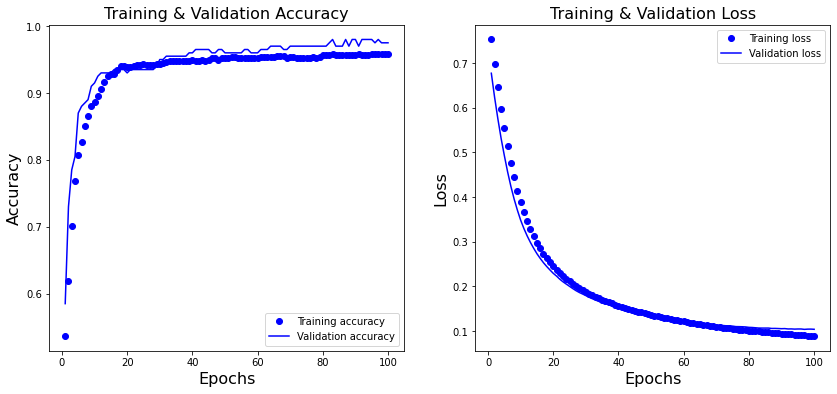

In [29]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [30]:
# Classification of Primary Type
y2 = pokedex["Type 1"]
y2.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, stratify=y2,random_state=1)

X_scaler2 = StandardScaler().fit(X_train)

X_train_scaled = X_scaler2.transform(X_train)
X_test_scaled = X_scaler2.transform(X_test)

In [38]:
# One-hot encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)



{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=8))
model.add(Dense(units=18, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_5 (Dense)              (None, 18)                126       
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


'''
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''

"\nmodel.compile(optimizer='adam',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n"

In [42]:
 # Fit the model to the training data
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle = True,
    verbose = 2,
    validation_data=(X_test_scaled,y_test_categorical)
)

Epoch 1/100
19/19 - 0s - loss: 3.0268 - accuracy: 0.0767 - val_loss: 2.9615 - val_accuracy: 0.0850
Epoch 2/100
19/19 - 0s - loss: 2.9893 - accuracy: 0.0950 - val_loss: 2.9333 - val_accuracy: 0.0850
Epoch 3/100
19/19 - 0s - loss: 2.9580 - accuracy: 0.1033 - val_loss: 2.9098 - val_accuracy: 0.0900
Epoch 4/100
19/19 - 0s - loss: 2.9317 - accuracy: 0.1200 - val_loss: 2.8888 - val_accuracy: 0.1000
Epoch 5/100
19/19 - 0s - loss: 2.9079 - accuracy: 0.1217 - val_loss: 2.8705 - val_accuracy: 0.1200
Epoch 6/100
19/19 - 0s - loss: 2.8872 - accuracy: 0.1333 - val_loss: 2.8543 - val_accuracy: 0.1450
Epoch 7/100
19/19 - 0s - loss: 2.8688 - accuracy: 0.1400 - val_loss: 2.8402 - val_accuracy: 0.1400
Epoch 8/100
19/19 - 0s - loss: 2.8522 - accuracy: 0.1383 - val_loss: 2.8270 - val_accuracy: 0.1300
Epoch 9/100
19/19 - 0s - loss: 2.8370 - accuracy: 0.1433 - val_loss: 2.8148 - val_accuracy: 0.1150
Epoch 10/100
19/19 - 0s - loss: 2.8226 - accuracy: 0.1433 - val_loss: 2.8041 - val_accuracy: 0.1250
Epoch 11/

Epoch 84/100
19/19 - 0s - loss: 2.3557 - accuracy: 0.2533 - val_loss: 2.5240 - val_accuracy: 0.1900
Epoch 85/100
19/19 - 0s - loss: 2.3534 - accuracy: 0.2483 - val_loss: 2.5244 - val_accuracy: 0.1900
Epoch 86/100
19/19 - 0s - loss: 2.3512 - accuracy: 0.2517 - val_loss: 2.5242 - val_accuracy: 0.1850
Epoch 87/100
19/19 - 0s - loss: 2.3490 - accuracy: 0.2550 - val_loss: 2.5211 - val_accuracy: 0.1850
Epoch 88/100
19/19 - 0s - loss: 2.3469 - accuracy: 0.2550 - val_loss: 2.5203 - val_accuracy: 0.1850
Epoch 89/100
19/19 - 0s - loss: 2.3452 - accuracy: 0.2550 - val_loss: 2.5210 - val_accuracy: 0.1850
Epoch 90/100
19/19 - 0s - loss: 2.3434 - accuracy: 0.2533 - val_loss: 2.5192 - val_accuracy: 0.1850
Epoch 91/100
19/19 - 0s - loss: 2.3411 - accuracy: 0.2533 - val_loss: 2.5176 - val_accuracy: 0.1850
Epoch 92/100
19/19 - 0s - loss: 2.3393 - accuracy: 0.2550 - val_loss: 2.5182 - val_accuracy: 0.1850
Epoch 93/100
19/19 - 0s - loss: 2.3375 - accuracy: 0.2550 - val_loss: 2.5172 - val_accuracy: 0.1850


In [43]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 2.5133 - accuracy: 0.1850
Normal Neural Network - Loss: 2.5132689476013184, Accuracy: 0.1850000023841858


In [ ]:
# This is Michaels section of code

In [ ]:
# This is Masons section of code

# Set our prediction targets and name them

y = pokedex["Legendary"]
target_names = ["negative", "positive"]


#Classification of Legendary Status

X = pokedex.drop("Legendary", axis=1)

X = X.drop("#", axis=1)

X = X.drop("Name", axis=1)

X = X.drop("Type 1", axis=1)

X = X.drop("Type 2", axis=1)

feature_names = X.columns

X.head()

In [ ]:
# Import learning and training for the random forest

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:

# Import the random forest classifier and input values and variables

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier (n_estimators=300)

rf = rf.fit(X_train, y_train)

rf.score(X_test, y_test)

In [ ]:
# Sort by importance for predicting Legendary Status

sorted(zip(rf.feature_importances_, feature_names), reverse = True)

In [ ]:

# Classification of Primary Type

y2 = pokedex["Type 1"]

y2.value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=47)


In [ ]:
rf = RandomForestClassifier (n_estimators=300)

rf = rf.fit(X_train, y_train)

rf.score(X_test, y_test)